## Chapter 6. 학습 관련 기술들

* 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있는 방법들 

#### 6.1 매개변수 갱신
* 신경망 학습의 목적 : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
    * 매개 변수의 최적값을 찾는 문제 : 최적화(optimization)
        * 확률적 경사 하강법(SGD) : 기울기(미분)을 이용

* SGD
    * $W \leftarrow W - \eta\frac{\partial L}{\partial W}$
        * $W$(가중치 매개변수)를 갱신
        * $\eta$ : learning rate(학습률)

In [1]:
class SGD :
    def __init__(self, lr=0.01) :
        self.lr = lr
    
    # SGD과정에서 반복해서 불림 
    def update(self, params, grads) : 
        for key in params.keys() :
            params[key] -= self.lr * grads[key]


In [ ]:
# 진행방식 예시 
network = TwoLayerNet(...)
optimizer = SGD()     # optimizer가 SGD를 수행해서 최적화를 수행 

for i in range(10000) :
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads) # optimizer : 최적화를 행하는 자 (갱신은 optimizer가 수행하니 parameter와 grads만 넘겨주면 됨)
    ...

* SGD의 단점
    * 예시 그래프 : $f(x,y) = \frac{1}{20}x^2 + y^2$
        * 비등방성(anisotropy) 함수(방향에 따라 성질(기울기)이 달라지는 함수)에서는 탐색 경로가 비효율적
        * 이러한 단점을 개선해줄 수 있는 방법 
        
* Momentum : $V \leftarrow \alpha V - \eta \frac{\partial L}{\partial W}$ , $W \leftarrow W + V$
    * v : 물체의 속도
    * 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄
    * 공이 그릇 바닥을 구르듯 움직임 : SGD보다 지그재그가 덜함 

In [2]:
# 모멘텀 클래스 
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9 ) :
        self.lr = lr
        self.momentum = momentum
        self.v = None # 초기화때는 아무 값도 담지 않고, 대신 update()가 처음 호출 될때 딕셔너리 변수로 저장
    
    def update(self, params, grads) :
        if self.v is None :
            self.v = {}
            for key, val in params.items() :
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys() :
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            

* AdaGrad
    * 학습률($\eta$)값이 너무 작으면 학습시간이 길어지고, 너무 크면 학습이 제대로 이뤄지지 않음
        * 학습률 감소(learning rate decay) : 학습률을 효과적으로 정하는 기술(진행에 따라 학습률을 점차 줄여가는 방법)
    * AdaGrad : 각각의 매개변수의 원소마다 적응적으로(adaptive) 갱신정도(학습률)를 조정
        * $h\leftarrow h+\frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$
        * $W \leftarrow W -\eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}$
        * 최솟값을 향해 효율적으로 움직임 : 갱신강도도 빠르게 약해지고 지그재그 움직임도 점점 줄어듬 
 

In [3]:
# AdaGrad
class AdaGrad :
    def __init__(self, lr=0.01) :
        self.lr = lr
        self.h = None
    
    def update(self, params, grads) :
        if self.h is None :
            self.h = {}
            for key, val in params.items() :
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys() :
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0으로 나누는 사태를 방지하기위해 1e-7 더해줌
            

* Adam : 모멘텀과 AdaGrad를 융합한 듯한 방법, 매개변수 공간을 더욱 효율적으로 탐색
    * 하이퍼 파라미터의 '편향 보정'이 진행
    * 그릇 바닥을 구르듯 움직이지만 모멘텀 때보다 좌우 흔들림이 적음(갱신 강도를 적응적으로 조정하기 때문)
    * parameter 3개
        1. 학습률 $\alpha$
        2. 일차 모멘텀용 계수 $\beta_1$ = 0.9
        3. 이차 모멘텀용 계수 $\beta_2$ = 0.999 
        

* 어느 갱신 방법을 이용할 것인가?
    * 풀어야 할 문제가 무엇이냐에 따라 적합한 기법이 다름
        * 하이퍼 파라미터의 설정에 따라서도 결과가 바뀜 
        * 여러가지 상황을 고려해 여러 방법을 시도해 볼 것!

* MNIST 데이터셋으로 본 갱신 방법 비교
    * 일반적으로 나머지 세 기법에 비해 SGD의 학습 진도가 느림 
    * 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이)에 따라 결과가 달라짐

#### 6.2 가중치의 초깃값
* 가중치의 초깃값 설정에 따라 신경망 학습의 성패가 결정되는 경우가 잦음 
    
* 초깃값을 0으로 하면 : 오버피팅을 억제해 범용 성능을 높이는 테크닉(가중치 감소: weight decay)
    * 가중치 감소 : 가중치 매개변수의 값이 작아지도록 학습하는 방법 
        * 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것
    * 가중치를 모두 0으로 설정하면 올바른 학습이 일어나지 않음 
        * 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 
            * 가중치가 고르게 되어버리는 상황을 막기위해 0에 가까운 초깃값을 무작위로 설정해야함
        
* 은닉층의 활성화 값(활성화 함수의 출력 데이터) 분포
    * 가중치의 초깃값에 따라 은닉층 활성화 값들이 어떻게 변화하는지 확인
    * w = 1 : 기울기 소실
    * w = 0.01 : 표현력 제한
    * Xavier 초깃값 : 초깃값의 표준편차가 $\frac{1}{\sqrt n}$이 되도록 설정 ( n : 앞 층의 노드 수)
        * 층이 깊어질수록 형태가 다소 일그러지지만, 확실히 넓게 분포됨 
           * 각 층에 흐르는 데이터가 적당히 퍼져있고, 시그모이드 함수의 표현력도 제한받지 않으므로 학습이 효율적일 것으로 기대
           
    
    

In [33]:
# 은닉층의 활성화 값 분포(시그모이드 5층 신경망의 활성화값 분포) 
import numpy as np
import matplotlib.pyplot as plt

def relu(x) :
    return np.maximum(0, x)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100       # 각 은닉층의 노드(뉴런) 수
hidden_layer_size =5 # 은닉층이 5개
activations = {}     # 이곳에 각 층의 활성화 결과(활성화 값)을 저장 

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]

    w = np.random.randn(node_num, node_num)*1 # 랜덤한 작은값 (1, 0.01)    
#   w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavier 초기값
    a = np.dot(x, w)
    z = sigmoid(a)
#   z = tanh(a)
#   z = relu(a)
    activations[i] = z

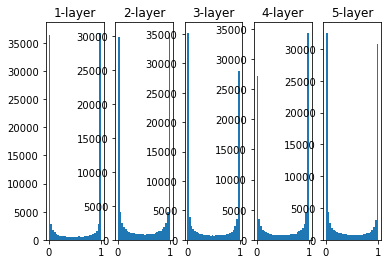

In [34]:
# 히스토그램 그리기
# 0과 1에 치우쳐 분포 : 기울기 소실(gradient vanishing)
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

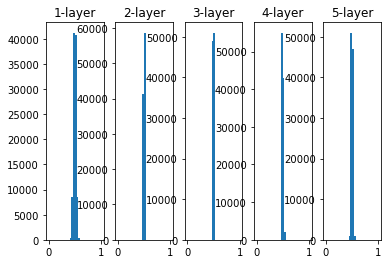

In [10]:
# w = np.random.randn(node_num, node_num) * 0.01
# 다수의 활성화 값들이 거의 같은 값을 출력 : vygusfurdmf wpgks 
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

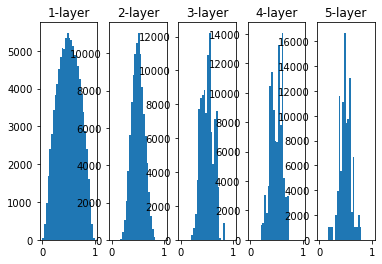

In [27]:
# Xavier 초깃값
# node_num = 100
# w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()


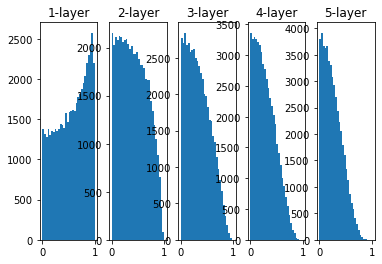

In [30]:
# Xavier 초깃값
# node_num = 100
# w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
# 오른쪽으로 갈수록 약간씩 일그러짐 : sigmoid대신 tanh함수를 사용하면 개선됨 : 활성화 함수용으로는 원점대칭함수가 바람직하다고 알려져 있음 
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()



* Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과
    * sigmoid, tanh함수는 좌우 대칭, 중앙 부근이 선형

* ReLU를 사용할 때의 가중치 초깃값
    * ReLU에 특화된 초깃값을 이용해야함 : He 초깃값 
        * 발견한 인물 Kaiming He의 이름을 땀 
        * 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용 (n : 앞 계층의 노드가 n개)
        * ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 직관적으로 해석가능

In [ ]:
# 함수로 ReLU를 이용한 경우의 활성화 값 분포(표준편차가 0.01인 정규분포),Xavier 초깃값, He초깃값

In [39]:
# 은닉층의 활성화 값 분포(시그모이드 5층 신경망의 활성화값 분포) 
import numpy as np
import matplotlib.pyplot as plt

def relu(x) :
    return np.maximum(0, x)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100       # 각 은닉층의 노드(뉴런) 수
hidden_layer_size =5 # 은닉층이 5개
activations = {}     # 이곳에 각 층의 활성화 결과(활성화 값)을 저장 

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]

#   w = np.random.randn(node_num, node_num)*0.01 # 랜덤한 작은값 (1, 0.01)    
#   w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavier 초기값
    w = np.random.randn(node_num, node_num)*np.sqrt(2) / np.sqrt(node_num) # Xavier 초기값
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z

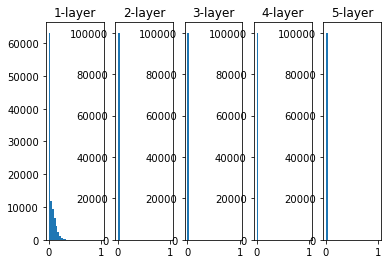

In [36]:
# std = 0.01
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

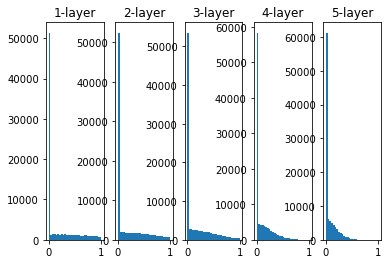

In [38]:
# Xavier
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

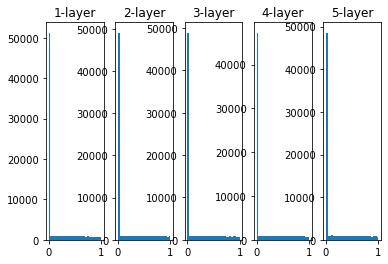

In [40]:
# He
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

* MNIST 데이터셋으로 본 가중치 초깃값 비교
    * 소스코드 참고
    * 가중치의 초깃값은 신경망 학습에 아주 중요한 포인트

#### 6.3 배치 정규화(Batch Normalization)
* 각 층이 활성화를 적당히 퍼뜨리도록 강제하는 방법

* 배치 정규화 알고리즘
    * 배치 정규화가 주목받는 이유
        * 학습을 빨리 진행할 수 있다(학습 속도 개선)
        * 초깃값에 크게 의존하지 않는다(골치 아픈 초깃값 선택 장애 ㅂㅇ)
        * 오버피팅을 억제한다(드롭아웃 등의 필요성 감소)
    * 배치 정규화의 기본 아이디어
        * 각 층에서의 활성화 값이 적당히 분포되도록 조정 : 신경망에 배치 정규화(Batch Norm)계층을 신경망에 삽입
        1. 데이터 분포가 평균: 0, 분산 : 1이 되도록 정규화
            * $\mu \leftarrow \frac{1}{m}\Sigma{x_i}$
            * $\sigma^2_B \leftarrow \frac{1}{m}\Sigma({x_i - \mu_B})^2$
            * $\hat{x_i} \leftarrow \frac{x_i-\mu_B}{\sqrt{\sigma^2_B+\epsilon}}$
            * 단순히 미니배치 입력데이터를 평균0, 분산1인 데이터로 변환
                * 이 처리를 활성화 함수의 앞(혹은 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 함
        2. 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift)변환을 수행    
            * $y_i \leftarrow \gamma \hat{x_i}+ \beta$
                * $\gamma$가 확대를, $\beta$가 이동을 담당($\gamma=1,\beta=0$부터 시작, 학습과 함께 적합한 값으로 조정)
                
* 배치 정규화의 효과
    * 소스코드 참고 
    * 배치정규화가 학습속도를 높임
    

#### 6.4 바른 학습을 위해
* 오버피팅이 일어나는 경우
    * 매개변수가 많고 표현력이 높은 모델
    * 훈련 데이터가 적음
    

In [3]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

train loss:2.308864913025623
=== epoch:1, train acc:0.09666666666666666, test acc:0.093 ===
train loss:2.310298697849476
train loss:2.3092999837053707
train loss:2.3004947039071038
=== epoch:2, train acc:0.09666666666666666, test acc:0.0922 ===
train loss:2.2734016631934755
train loss:2.316078856157281
train loss:2.3153999528904063
=== epoch:3, train acc:0.09666666666666666, test acc:0.0932 ===
train loss:2.3103714347174904
train loss:2.309033431378178
train loss:2.2715306743437593
=== epoch:4, train acc:0.09, test acc:0.0918 ===
train loss:2.3066071636171785
train loss:2.312148425785761
train loss:2.3146402428307864
=== epoch:5, train acc:0.09, test acc:0.0913 ===
train loss:2.310490860768014
train loss:2.2789751007959045
train loss:2.2871577065402913
=== epoch:6, train acc:0.09333333333333334, test acc:0.0909 ===
train loss:2.2957370936609456
train loss:2.287280833037071
train loss:2.2933380646013632
=== epoch:7, train acc:0.09333333333333334, test acc:0.0902 ===
train loss:2.2898758

=== epoch:56, train acc:0.25333333333333335, test acc:0.2159 ===
train loss:2.2161527082846924
train loss:2.224897031885726
train loss:2.2261915459526644
=== epoch:57, train acc:0.25666666666666665, test acc:0.2179 ===
train loss:2.224289281469596
train loss:2.211878434091954
train loss:2.2359046845945825
=== epoch:58, train acc:0.25666666666666665, test acc:0.2248 ===
train loss:2.232434405427659
train loss:2.2212951399657688
train loss:2.2098006283840386
=== epoch:59, train acc:0.26666666666666666, test acc:0.2277 ===
train loss:2.2110834692074484
train loss:2.2015452267479234
train loss:2.2374892118112935
=== epoch:60, train acc:0.25666666666666665, test acc:0.2321 ===
train loss:2.210615233829237
train loss:2.220738966791779
train loss:2.2343838487578047
=== epoch:61, train acc:0.2733333333333333, test acc:0.2396 ===
train loss:2.222814016903672
train loss:2.203464564913153
train loss:2.189847938585257
=== epoch:62, train acc:0.27666666666666667, test acc:0.2441 ===
train loss:2.18

=== epoch:112, train acc:0.41, test acc:0.351 ===
train loss:2.0607780086804204
train loss:2.0763012855311893
train loss:2.0947127103420335
=== epoch:113, train acc:0.4033333333333333, test acc:0.3471 ===
train loss:2.0263375016286016
train loss:2.0323972371722667
train loss:2.0665378081332566
=== epoch:114, train acc:0.4066666666666667, test acc:0.3422 ===
train loss:2.0319322976528684
train loss:2.0686076835677296
train loss:2.0455390208920177
=== epoch:115, train acc:0.4066666666666667, test acc:0.3419 ===
train loss:2.0287270605115992
train loss:2.07481538747971
train loss:2.0591628282898493
=== epoch:116, train acc:0.4, test acc:0.3423 ===
train loss:2.007856775508124
train loss:2.0633951136617874
train loss:1.9733833929220652
=== epoch:117, train acc:0.39, test acc:0.3396 ===
train loss:2.0663626459225983
train loss:2.117913150150761
train loss:2.0544696242584637
=== epoch:118, train acc:0.3933333333333333, test acc:0.3492 ===
train loss:2.009018061744008
train loss:2.06275693187

=== epoch:168, train acc:0.44333333333333336, test acc:0.3919 ===
train loss:1.776340366345236
train loss:1.7120635894064042
train loss:1.6978640841788735
=== epoch:169, train acc:0.44333333333333336, test acc:0.3914 ===
train loss:1.7249218734839575
train loss:1.6822164386740621
train loss:1.6986860728019153
=== epoch:170, train acc:0.44, test acc:0.3906 ===
train loss:1.6720573421342748
train loss:1.6017849212866853
train loss:1.7420144891570148
=== epoch:171, train acc:0.44, test acc:0.389 ===
train loss:1.6894348056961288
train loss:1.8345944395588996
train loss:1.7372582639301408
=== epoch:172, train acc:0.44666666666666666, test acc:0.3896 ===
train loss:1.643397565377911
train loss:1.5975516329893225
train loss:1.7798082433043536
=== epoch:173, train acc:0.44666666666666666, test acc:0.3899 ===
train loss:1.7772709995123706
train loss:1.8049525189292763
train loss:1.7623917535310045
=== epoch:174, train acc:0.45, test acc:0.3915 ===
train loss:1.8343026257612567
train loss:1.786

=== epoch:224, train acc:0.59, test acc:0.4718 ===
train loss:1.4063530903215276
train loss:1.436102389399276
train loss:1.465710618079423
=== epoch:225, train acc:0.5933333333333334, test acc:0.4762 ===
train loss:1.569681638094715
train loss:1.4142541705955904
train loss:1.3742750819373841
=== epoch:226, train acc:0.59, test acc:0.4774 ===
train loss:1.465448641959599
train loss:1.493680641787763
train loss:1.2955616407350519
=== epoch:227, train acc:0.5933333333333334, test acc:0.4828 ===
train loss:1.5236101016366232
train loss:1.337238824101587
train loss:1.3554212348058363
=== epoch:228, train acc:0.5966666666666667, test acc:0.4826 ===
train loss:1.4023132274216692
train loss:1.409244463634912
train loss:1.4294163496241934
=== epoch:229, train acc:0.6033333333333334, test acc:0.4851 ===
train loss:1.4067162163090774
train loss:1.460403210916214
train loss:1.3433721365911486
=== epoch:230, train acc:0.6, test acc:0.4867 ===
train loss:1.371706663122836
train loss:1.48617967982082

=== epoch:280, train acc:0.7133333333333334, test acc:0.5666 ===
train loss:1.2172598389805307
train loss:1.0087480663525898
train loss:1.0782959883756467
=== epoch:281, train acc:0.7133333333333334, test acc:0.5669 ===
train loss:1.17872879517745
train loss:1.1121282958492726
train loss:1.080984827139914
=== epoch:282, train acc:0.7066666666666667, test acc:0.5685 ===
train loss:1.1893716079859475
train loss:1.2131465139563131
train loss:1.1740591956819195
=== epoch:283, train acc:0.7233333333333334, test acc:0.5805 ===
train loss:1.1494449032774166
train loss:1.2965041843496303
train loss:1.1475692506020472
=== epoch:284, train acc:0.72, test acc:0.5869 ===
train loss:1.0541817815238301
train loss:1.17428694460034
train loss:1.0824731133093655
=== epoch:285, train acc:0.7266666666666667, test acc:0.5835 ===
train loss:1.2353951173414628
train loss:1.2578831357481386
train loss:1.2792633786140513
=== epoch:286, train acc:0.7366666666666667, test acc:0.5914 ===
train loss:1.04681492612

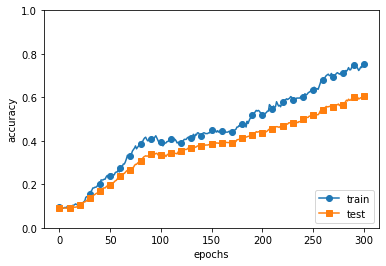

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [24]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
from common.optimizer import SGD
from common.multi_layer_net import MultiLayerNet



# 인위적으로 오버피팅 생성
(x_train, t_train),(x_test, t_test) = load_mnist(normalize= True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]


In [29]:
network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01) # 학습률이 0.01인 SGD로 매개변수 갱신
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch ,t_batch)
    optimizer.update(network.params, grads)
    
    if i%iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs :
            break


In [30]:
len(train_acc_list)

201

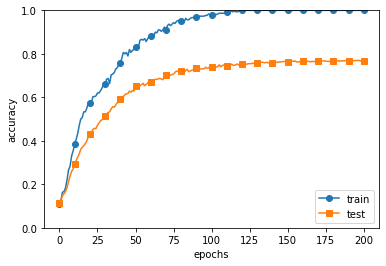

In [31]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 가중치 감소(weight decay) : 오버피팅 억제용으로 가장 많이 사용해온 방법
    * 오버피팅의 주된 이유 : 가중치 매개변수의 값이 커서 발생
        * 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과
    * 신경망 학습의 목적 : 손실 함수의 값을 줄이는 것 
        * 손실함수의 가중치의 L2 norm을 손실 함수에 더함으로써 가중치가 커지는 것을 억제
            * L2 norm : 각 원소의 제곱들을 더한뒤 루트
            * L1 norm : 각 원소들의 절대값의 합
            * 가중치 W에 대한 L2 norm에 따른 가중치 감소 : $\frac{1}{2}\lambda W^2$
            * $\lambda$ : 정규화의 세기를 조절하는 하이퍼 파라미터
                * 커질 수록 가중치에 대한 페널티가 커짐 
                * 모든 가중치 각각의 손실 함수에 $\frac{1}{2}\lambda W^2$를 더함
                    * 오차역전파법에서는 해당 값을 미분한 $\lambda W$를 더함
         
* 드롭아웃(Dropout)
    * 뉴런을 임의로 삭제하면서 학습하는 방법
        * 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제
            * 삭제된 뉴런 : 신호를 전달하지 않음 
            * traing 때는 데이터를 흘릴 떄마다 삭제할 뉴런을 무작위로 선택
        * test : 모든 뉴런에 신호를 전달, 훈련 때 삭제 안한 비율을 곱하여 출력(안곱해도 됨) 
    * 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줌 
        * 훈련 데이터에 대한 정확도가 100%에 도달하지 않고, 표현력을 높이면서 오버피팅을 억제할 수 있음
        

In [2]:
# drop out 예시
# self.mask에 삭제할 뉴런을 False로 표시

class Dropout :
    def __init__(self, dropout_ratio = 0.5) :
        self.dropout_ratio = dropout_ratio
        self.mask = None  
        
    def forward(self, x, train_flg = True) :
        if train_flg :
            # x와 형상이 같은 배열을 무작위로 생성, dropout_ratio보다 큰 원소만 True로 설정 
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio 
            return x * self.mask
        else :
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout) :
        return dout * self.mask


#### 6.5 적절한 하이퍼 파라미터 값 찾기
* 하이퍼파라미터 : 각 층의 뉴런수, 배치 크기, 매개변수 갱신 시의 learning rate, 가중치 감소(weight decay)

* 효율적으로 하이퍼파라미터 값을 탐색하는 방법 
    * 검증 데이터(validation data) : 하이퍼파라미터의 적절성을 평가하기 위한 데이터
        * 하이퍼파라미터를 다양한 값으로 설정하고 검증 할때는 시험 데이터를 사용해서는 안됨
            * 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅 되기 때문
        * 훈련 데이터 : 매개변수 학습
        * 검증 데이터 : 하이퍼파라미터 성능 평가
        * 시험 데이터 : 신경망의 범용 성능 평가 
        

In [8]:
# validation data example
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 분리하기전 훈련 데이터를 뒤섞는다
# 데이터 셋안의 데이터가 치우쳐 있을지 모르기 때문
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0]*validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


* 하이퍼파라미터 최적화
    * 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여감
        1. 우선 대략적인 범위를 설정
        2. 설정 범위내에서 무작위로 하이퍼 파라미터 값을 샘플링
            * 신경망의 hyperparameter optimizaiton에서는 grid search같은 규칙적인 탐색 보다는 무작위 샘플링법이 더 좋은 결과를 낸다고 알려져 있음
        3. 해당 값으로 정확도를 평가(학습한 뒤 검증 데이터로 정확도를 평가)
            * epoch는 작게 설정
        4. 1,2,3 반복하며 범위를 좁혀나감
            * 정확도의 결과를 비교해 가면서 범위를 좁힘 
    * 대략적으로 하이퍼파라미터의 범위를 설정
        * 최적화 할 때 딥러닝 학습에는 오랜 시간이 걸리기 때문에 나쁠 듯한 값은 일찍 포기하는게 좋음
            * 학습을 위한 에폭을 작게 하여 1회 평가에 걸리는 시간을 단축하는 것이 효과적
    

* 하이퍼파라미터 최적화 구현하기
    * 소스코드 참고

#### 6.6 정리
* 매개 변수 갱신 방법에는 확률적 경사하강법(SGD)외에도 모멘텀, AdaGrad, Adam등이 있다 
* 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요
* 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적
* 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 됨
* 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 존재
* 하이퍼파라미터 값 탐색은 최적값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적